In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filepath = "../data/prelim_fundamental_dataset.csv"
df = pd.read_csv(filepath)
df = df[['gvkey', 'jdate', 'ib', 'spi', 'E', 'csho', 'Shrout_at_Pricet', 'Pricet', 'at']]

C:\Users\shaya\AppData\Local\Temp\ipykernel_34032\4160348378.py:2: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [5]:
df['E_future'] = df.groupby('gvkey')['E'].shift(-1)

       gvkey       jdate      ib  spi       E    csho  Shrout_at_Pricet  \
22901   2285  1967-03-31  76.133  0.0  76.133  19.497            19.496   
22902   2285  1968-03-31  83.938  0.0  83.938  21.597            21.597   
22903   2285  1969-03-31  82.972  0.0  82.972  21.647            21.647   
22904   2285  1970-03-31  10.230  0.0  10.230  21.683            21.647   
22905   2285  1971-03-31  22.090  0.0  22.090  21.683            21.683   
22906   2285  1972-03-31  22.430  0.0  22.430  21.683            21.683   
22907   2285  1973-03-31  30.405  0.0  30.405  21.689            21.683   
22908   2285  1974-03-31  51.215  0.0  51.215  21.296            21.683   
22909   2285  1975-03-31  72.432  0.0  72.432  21.171            21.296   
22910   2285  1976-03-31  76.347  0.0  76.347  21.198            21.198   

       Pricet        at  E_future  
22901  82.500  1444.500    83.938  
22902  68.500  2030.400    82.972  
22903  50.875  2186.100    10.230  
22904  22.750  2602.444    22.

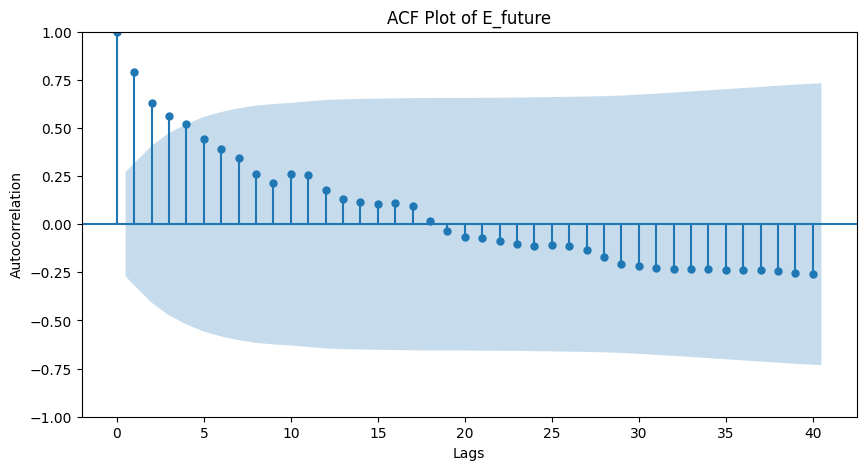

ADF Statistic: 1.0949072472118293
p-value: 0.9951729227844252
Critical Values: {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}

Interpretation:
The series is likely non-stationary.

Critical Values:
1%: -3.6055648906249997
5%: -2.937069375
10%: -2.606985625


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

#study for Boeing company
df_cleaned = df.loc[df.gvkey == 2285]
print(df_cleaned.head(10))
df_cleaned = df_cleaned.sort_values('jdate')

#ensure jdate is a datetime index
df_cleaned['jdate'] = pd.to_datetime(df_cleaned['jdate'])
df_cleaned = df_cleaned.set_index('jdate')

print(df_cleaned.index)
print(df_cleaned.index.dtype)

# ACF Plot
plt.figure(figsize=(10, 5))
plot_acf(df_cleaned['E_future'].dropna(), lags=40, ax=plt.gca(), )  # Adjust lags as needed
plt.title('ACF Plot of E_future')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Dickey-Fuller Test
result = adfuller(df_cleaned['E_future'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation of Dickey-Fuller test
print('\nInterpretation:')
if result[1] <= 0.05:
  print('The series is likely stationary.')
else:
  print('The series is likely non-stationary.')

print('\nCritical Values:')
for key, value in result[4].items():
  print(f'{key}: {value}')

<Axes: xlabel='jdate'>

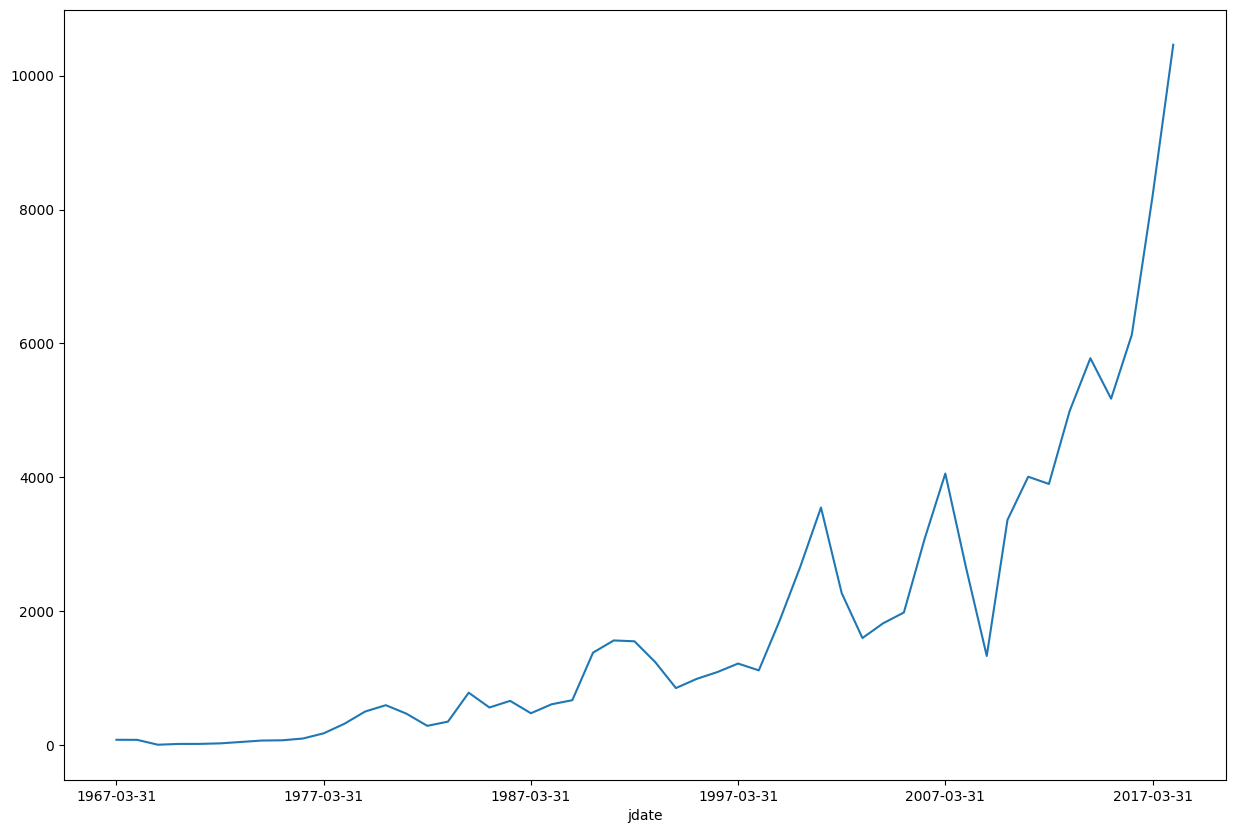

In [12]:

#study for Boeing company
df_cleaned = df.loc[df.gvkey == 2285]
df_cleaned.set_index('jdate')['E_future'].plot(figsize = (15,10))

       gvkey       jdate      ib  spi       E    csho  Shrout_at_Pricet  \
22901   2285  1967-03-31  76.133  0.0  76.133  19.497            19.496   
22902   2285  1968-03-31  83.938  0.0  83.938  21.597            21.597   
22903   2285  1969-03-31  82.972  0.0  82.972  21.647            21.647   
22904   2285  1970-03-31  10.230  0.0  10.230  21.683            21.647   
22905   2285  1971-03-31  22.090  0.0  22.090  21.683            21.683   
22906   2285  1972-03-31  22.430  0.0  22.430  21.683            21.683   
22907   2285  1973-03-31  30.405  0.0  30.405  21.689            21.683   
22908   2285  1974-03-31  51.215  0.0  51.215  21.296            21.683   
22909   2285  1975-03-31  72.432  0.0  72.432  21.171            21.296   
22910   2285  1976-03-31  76.347  0.0  76.347  21.198            21.198   

       Pricet        at  E_future  
22901  82.500  1444.500    83.938  
22902  68.500  2030.400    82.972  
22903  50.875  2186.100    10.230  
22904  22.750  2602.444    22.

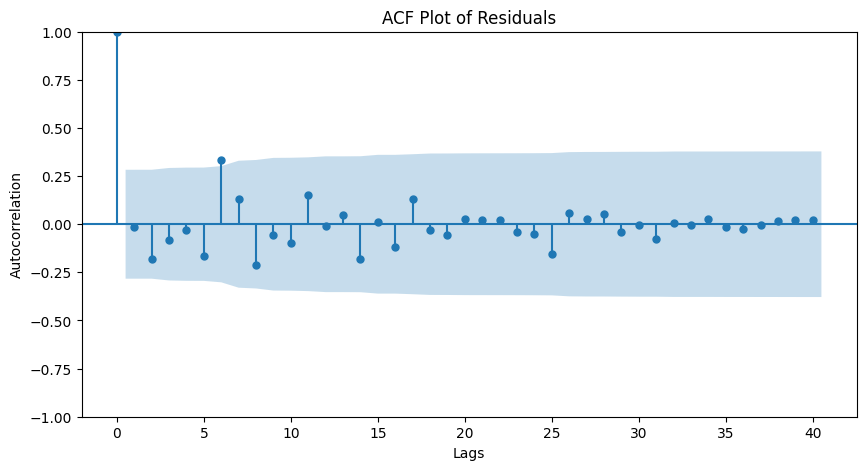

ADF Statistic (Residuals): -1.3306525681558357
p-value (Residuals): 0.6150346958019439
Critical Values (Residuals): {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}

Interpretation (Residuals):
The residuals are likely non-stationary.

Critical Values (Residuals):
1%: -3.6209175221605827
5%: -2.9435394610388332
10%: -2.6104002410518627


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Study for Boeing company
df_cleaned = df.loc[df.gvkey == 2285]
print(df_cleaned.head(10))
df_cleaned = df_cleaned.sort_values('jdate')

# Ensure jdate is a datetime index
df_cleaned['jdate'] = pd.to_datetime(df_cleaned['jdate'])
df_cleaned = df_cleaned.set_index('jdate')

print(df_cleaned.index)
print(df_cleaned.index.dtype)

# Create lagged variables
for i in range(1, 5):
    df_cleaned[f'E_future_lag_{i}'] = df_cleaned['E_future'].shift(i)

# Drop NaN from lagged variables
df_cleaned_regression = df_cleaned.dropna()

# Regression with lags
X = df_cleaned_regression[['E_future_lag_1', 'E_future_lag_2', 'E_future_lag_3', 'E_future_lag_4']]
y = df_cleaned_regression['E_future']

X = sm.add_constant(X)  # Add a constant (intercept)
model = sm.OLS(y, X).fit()
print(model.summary())

# Get residuals
residuals = model.resid

# ACF Plot of residuals
plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF Plot of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Dickey-Fuller Test of residuals
result_residuals = adfuller(residuals)
print('ADF Statistic (Residuals):', result_residuals[0])
print('p-value (Residuals):', result_residuals[1])
print('Critical Values (Residuals):', result_residuals[4])

# Interpretation of Dickey-Fuller test of residuals
print('\nInterpretation (Residuals):')
if result_residuals[1] <= 0.05:
    print('The residuals are likely stationary.')
else:
    print('The residuals are likely non-stationary.')

print('\nCritical Values (Residuals):')
for key, value in result_residuals[4].items():
    print(f'{key}: {value}')

<Axes: xlabel='jdate'>

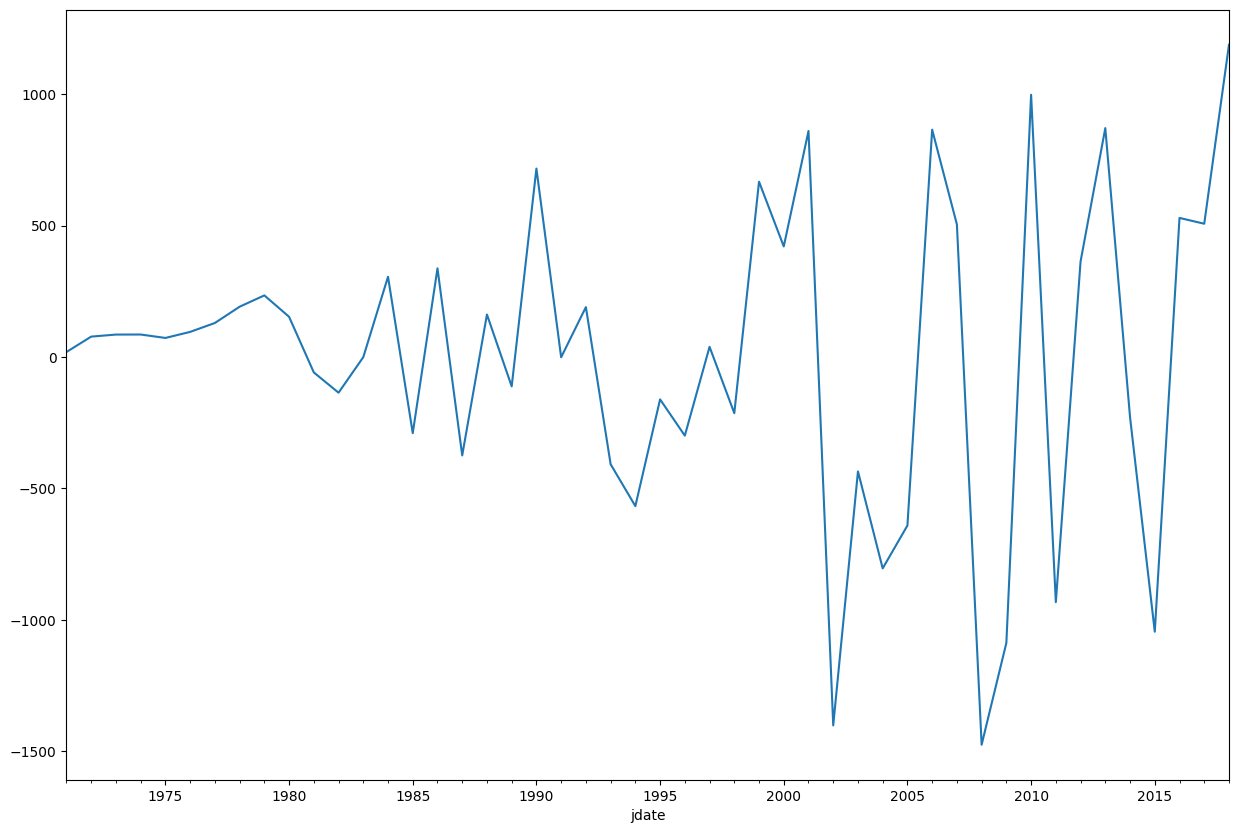

In [20]:
residuals.plot(figsize = (15,10))

In [22]:
#test residuals till 2000

residuals = residuals.loc[residuals.index < '2000-01-01']
# # ACF Plot of residuals
# plt.figure(figsize=(10, 5))
# plot_acf(residuals, lags=40, ax=plt.gca())
# plt.title('ACF Plot of Residuals')
# plt.xlabel('Lags')
# plt.ylabel('Autocorrelation')
# plt.show()

# Dickey-Fuller Test of residuals
result_residuals = adfuller(residuals)
print('ADF Statistic (Residuals):', result_residuals[0])
print('p-value (Residuals):', result_residuals[1])
print('Critical Values (Residuals):', result_residuals[4])

# Interpretation of Dickey-Fuller test of residuals
print('\nInterpretation (Residuals):')
if result_residuals[1] <= 0.05:
    print('The residuals are likely stationary.')
else:
    print('The residuals are likely non-stationary.')

print('\nCritical Values (Residuals):')
for key, value in result_residuals[4].items():
    print(f'{key}: {value}')

ADF Statistic (Residuals): -3.0894713122213187
p-value (Residuals): 0.02734223397044122
Critical Values (Residuals): {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}

Interpretation (Residuals):
The residuals are likely stationary.

Critical Values (Residuals):
1%: -3.7112123008648155
5%: -2.981246804733728
10%: -2.6300945562130176


In [23]:
df_cleaned.head()

,gvkey,ib,spi,E,csho,Shrout_at_Pricet,Pricet,at,E_future,E_future_lag_1,E_future_lag_2,E_future_lag_3,E_future_lag_4
jdate,,,,,,,,,,,,,
1967-03-31,2285,76.133,0.0,76.133,19.497,19.496,82.500,1444.500,83.938,NaN,NaN,NaN,NaN
1968-03-31,2285,83.938,0.0,83.938,21.597,21.597,68.500,2030.400,82.972,83.938,NaN,NaN,NaN
1969-03-31,2285,82.972,0.0,82.972,21.647,21.647,50.875,2186.100,10.230,82.972,83.938,NaN,NaN
1970-03-31,2285,10.230,0.0,10.230,21.683,21.647,22.750,2602.444,22.090,10.230,82.972,83.938,NaN
1971-03-31,2285,22.090,0.0,22.090,21.683,21.683,20.750,2621.819,22.430,22.090,10.230,82.972,83.938


In [27]:
pd.to_datetime(df_cleaned.index).year

Index([1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019],
      dtype='int32', name='jdate')

In [32]:
df.head()

,gvkey,jdate,ib,spi,E,csho,Shrout_at_Pricet,Pricet,at,E_future,year
0,1010,1967-03-31,24.930,0.0,24.930,5.921,5.748,48.000,328.700,29.820,1970
1,1010,1968-03-31,29.820,0.0,29.820,5.748,5.643,39.875,361.700,21.640,1970
2,1010,1969-03-31,21.640,0.0,21.640,5.644,5.641,57.750,376.600,21.187,1970
3,1010,1970-03-31,21.187,0.0,21.187,5.641,5.641,49.250,420.645,21.990,1970
4,1010,1970-03-31,21.990,0.0,21.990,5.614,5.641,49.250,434.941,18.460,1970


In [ ]:
#scatter plot

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is already defined from previous code
# df['year'] = pd.to_datetime(df.jdate).dt.year
df.index = pd.to_datetime(df.index)
# df = df.set_index('jdate')


AttributeError: 'DataFrame' object has no attribute 'jdate'

In [41]:
df

,gvkey,ib,spi,E,csho,Shrout_at_Pricet,Pricet,at,E_future,year
jdate,,,,,,,,,,
1967-03-31,1010,24.930,0.000,24.930,5.921,5.748,48.00000,328.700,29.820,1967
1968-03-31,1010,29.820,0.000,29.820,5.748,5.643,39.87500,361.700,21.640,1968
1969-03-31,1010,21.640,0.000,21.640,5.644,5.641,57.75000,376.600,21.187,1969
1970-03-31,1010,21.187,0.000,21.187,5.641,5.641,49.25000,420.645,21.990,1970
1970-03-31,1010,21.990,0.000,21.990,5.614,5.641,49.25000,434.941,18.460,1970
...,...,...,...,...,...,...,...,...,...,...
2015-03-31,184996,-294.040,0.000,-294.040,125.688,126.362,188.77000,5849.251,-888.663,2015
2016-03-31,184996,-888.663,0.000,-888.663,131.425,133.858,229.77000,8092.460,-734.741,2016
2017-03-31,184996,-674.914,59.827,-734.741,161.561,164.164,278.29999,22664.076,-1836.654,2017


In [44]:
df.index

Index(['1967-03-31', '1968-03-31', '1969-03-31', '1970-03-31', '1970-03-31',
       '1971-03-31', '1972-03-31', '1973-03-31', '1974-03-31', '1975-03-31',
       ...
       '2019-03-31', '2012-03-31', '2012-03-31', '2013-03-31', '2014-03-31',
       '2015-03-31', '2016-03-31', '2017-03-31', '2018-03-31', '2019-03-31'],
      dtype='object', name='jdate', length=151025)

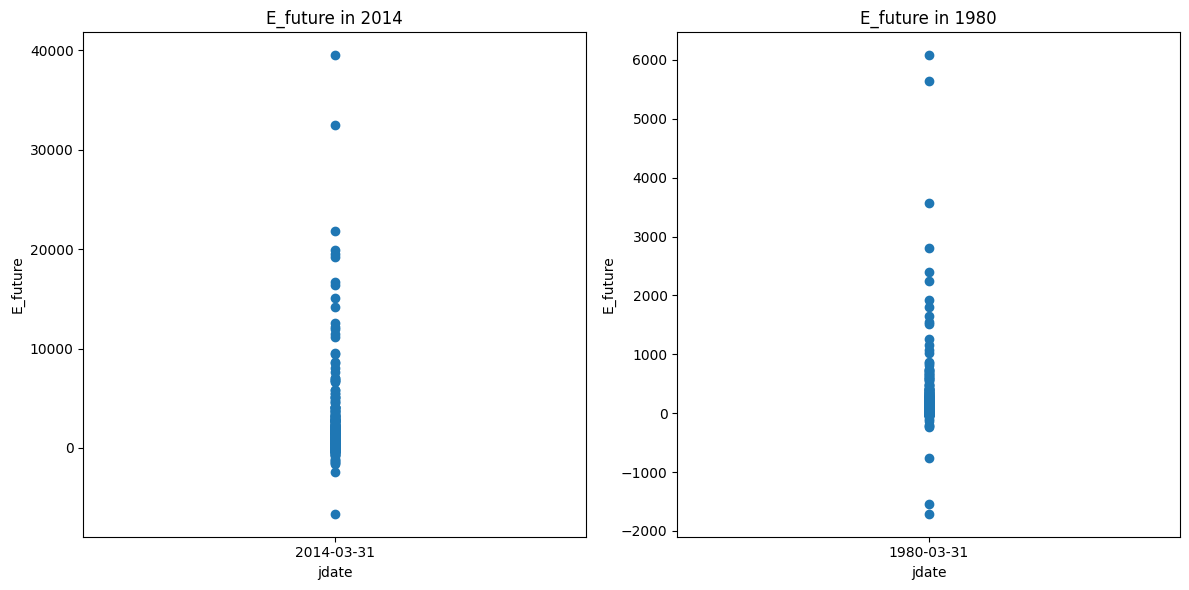

In [45]:
# Filter for 2014 and 1980
df_2014 = df[df.year == 2014]
df_1980 = df[df.year == 1980]

# Scatter plot for 2014
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.scatter(df_2014.index, df_2014['E_future'])
plt.title('E_future in 2014')
plt.xlabel('jdate')
plt.ylabel('E_future')

# Scatter plot for 1980
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.scatter(df_1980.index, df_1980['E_future'])
plt.title('E_future in 1980')
plt.xlabel('jdate')
plt.ylabel('E_future')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()